In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
ipos_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_1521.csv")
ipo_detail_df = pd.read_excel("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_details.xlsx")
ipo_rent = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_rent.csv")

In [3]:
detailed = pd.concat([ipo_detail_df.set_index('TICKER'), ipo_rent.set_index('index')], axis=1)
detailed = detailed.dropna()

In [4]:
x = "VOLUME TOTAL (R$)"

In [5]:
detailed['ESTRANGEIROS'] = detailed['ESTRANGEIROS'] * detailed[x]
detailed['VAREJO'] = detailed['VAREJO'] * detailed[x]
detailed['INSTITUCIONAL'] = detailed['INSTITUCIONAL'] * detailed[x]
detailed['OUTROS'] = detailed['OUTROS'] * detailed[x]

In [6]:
detailed['Sum'] = detailed['ESTRANGEIROS'] + detailed['INSTITUCIONAL']

In [7]:
detailed

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,1M,3M,TODAY,Sum
WIZS3,12.33,4527.0,6.028000e+08,5.920787e+07,2.255063e+08,3.143487e+08,3.737112e+06,12.733171,18.410381,14.111922,8.678021,-6.731549,5.398550e+08
AALR3,20.00,2035.0,6.741976e+08,6.304443e+07,2.492294e+08,3.575474e+08,4.376336e+06,-4.000000,-23.750000,-20.000000,-28.050000,-54.800000,6.067768e+08
MOVI3,7.50,1373.0,6.000838e+08,5.604806e+07,1.852221e+08,2.702926e+08,8.852101e+07,-2.666667,-1.333333,0.800000,31.600000,119.733333,4.555147e+08
PARD3,19.00,5042.0,8.776688e+08,8.823148e+07,4.215041e+08,3.626088e+08,5.324427e+06,8.947368,5.526316,5.315789,35.473684,-2.315789,7.841129e+08
AZUL4,21.00,1753.0,2.021037e+09,1.286870e+08,1.538987e+08,1.734591e+09,3.859947e+06,6.666667,14.000000,20.238095,19.190476,78.333333,1.888490e+09
CRFB3,15.00,4839.0,4.972706e+09,2.350857e+08,1.581675e+09,3.131042e+09,2.490340e+07,-0.666667,1.733333,0.533333,7.400000,40.866667,4.712717e+09
IRBR3,27.24,7879.0,2.003611e+09,1.938136e+08,5.368163e+08,1.265451e+09,7.530035e+06,7.525698,4.258443,9.397944,19.823789,-78.010279,1.802267e+09
OMGE3,15.60,1017.0,7.891765e+08,3.200568e+07,4.683273e+08,1.959576e+08,9.288585e+07,5.769231,8.910256,11.538462,12.884615,142.628205,6.642849e+08
CAML3,9.00,2940.0,1.147500e+09,1.036749e+08,6.365554e+08,3.982966e+08,8.973125e+06,-0.111111,-5.000000,-5.555556,-14.444444,10.444444,1.034852e+09
BKBR3,18.00,3672.0,1.983122e+09,1.916715e+08,2.694047e+08,1.513786e+09,8.259790e+06,-1.944444,-0.555556,-1.944444,-2.111111,-44.444444,1.783191e+09


In [9]:
columns = ['VOLUME TOTAL (R$)', 'VAREJO', 'INSTITUCIONAL', 'ESTRANGEIROS', 'OUTROS']
list_scores = []
for c in columns:
    list_scores.append(zscore(detailed[c]))
list_scores

[array([-0.61745969, -0.5773311 , -0.61898633, -0.46297132,  0.17965171,
         1.83861976,  0.16985774, -0.51270792, -0.31131431,  0.15834199,
         1.86748451,  0.57200305,  0.97254806, -0.5783108 , -0.55996183,
         1.1481897 ,  0.30319621, -0.17428552,  0.0299974 , -0.36458077,
        -0.21147001, -0.33527593, -0.84385104, -0.78747802, -0.34790337,
         0.0680654 , -0.73137732,  0.29809108, -0.37900465, -0.47348476,
         0.74707768, -0.60024889, -0.59215369,  0.74092478, -0.4068618 ,
         0.26323074, -0.44712784,  1.38277122, -0.67961247, -0.60251178,
        -0.40168115, -0.40437586, -0.56844946, -0.78427853,  5.44587922,
        -0.68285352, -0.50517342, -0.22293599,  0.52844874, -0.22329822,
        -0.27337628, -0.4316854 ]),
 array([-0.56529114, -0.54543181, -0.58164739, -0.41505494, -0.20564336,
         0.34511295,  0.13147428, -0.70609907, -0.33511472,  0.12038648,
         1.68169836,  0.35043756,  0.85967124, -0.46401946, -0.51782272,
         2.3041

In [10]:
df = pd.DataFrame(data=list_scores)
DF = df.T
DF

,0,1,2,3,4
0,-0.617460,-0.565291,-0.701613,-0.423914,-0.507493
1,-0.577331,-0.545432,-0.670755,-0.378980,-0.493850
2,-0.618986,-0.581647,-0.754013,-0.469740,1.302015
3,-0.462971,-0.415055,-0.446667,-0.373715,-0.473615
4,0.179652,-0.205643,-0.794757,1.053380,-0.504871
5,1.838620,0.345113,1.062437,2.505926,-0.055749
6,0.169858,0.131474,-0.296673,0.565394,-0.426542
7,-0.512708,-0.706099,-0.385761,-0.547061,1.395171
8,-0.311314,-0.335115,-0.166936,-0.336594,-0.395743
9,0.158342,0.120386,-0.644512,0.823705,-0.410967


In [12]:
DF['Sum'] = 0
for c in range(5):
    DF['Sum'] += abs(DF[c])
cx = pd.DataFrame.to_numpy(DF['Sum'])

In [13]:
detailed['Z-score'] = cx

In [14]:
detailed

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,1M,3M,TODAY,Sum,Z-score
WIZS3,12.33,4527.0,6.028000e+08,5.920787e+07,2.255063e+08,3.143487e+08,3.737112e+06,12.733171,18.410381,14.111922,8.678021,-6.731549,5.398550e+08,2.815770
AALR3,20.00,2035.0,6.741976e+08,6.304443e+07,2.492294e+08,3.575474e+08,4.376336e+06,-4.000000,-23.750000,-20.000000,-28.050000,-54.800000,6.067768e+08,2.666347
MOVI3,7.50,1373.0,6.000838e+08,5.604806e+07,1.852221e+08,2.702926e+08,8.852101e+07,-2.666667,-1.333333,0.800000,31.600000,119.733333,4.555147e+08,3.726401
PARD3,19.00,5042.0,8.776688e+08,8.823148e+07,4.215041e+08,3.626088e+08,5.324427e+06,8.947368,5.526316,5.315789,35.473684,-2.315789,7.841129e+08,2.172023
AZUL4,21.00,1753.0,2.021037e+09,1.286870e+08,1.538987e+08,1.734591e+09,3.859947e+06,6.666667,14.000000,20.238095,19.190476,78.333333,1.888490e+09,2.738303
CRFB3,15.00,4839.0,4.972706e+09,2.350857e+08,1.581675e+09,3.131042e+09,2.490340e+07,-0.666667,1.733333,0.533333,7.400000,40.866667,4.712717e+09,5.807846
IRBR3,27.24,7879.0,2.003611e+09,1.938136e+08,5.368163e+08,1.265451e+09,7.530035e+06,7.525698,4.258443,9.397944,19.823789,-78.010279,1.802267e+09,1.589941
OMGE3,15.60,1017.0,7.891765e+08,3.200568e+07,4.683273e+08,1.959576e+08,9.288585e+07,5.769231,8.910256,11.538462,12.884615,142.628205,6.642849e+08,3.546800
CAML3,9.00,2940.0,1.147500e+09,1.036749e+08,6.365554e+08,3.982966e+08,8.973125e+06,-0.111111,-5.000000,-5.555556,-14.444444,10.444444,1.034852e+09,1.545702
BKBR3,18.00,3672.0,1.983122e+09,1.916715e+08,2.694047e+08,1.513786e+09,8.259790e+06,-1.944444,-0.555556,-1.944444,-2.111111,-44.444444,1.783191e+09,2.157912


In [15]:
detailed.corr()

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,1M,3M,TODAY,Sum,Z-score
PREÇO POR AÇÃO,1.000000,0.450995,0.580883,0.536579,0.509920,0.575960,0.165714,0.159304,0.022601,-0.098896,-0.141413,-0.089067,0.588597,0.587426
Nº TOTAL DE INVESTIDORES,0.450995,1.000000,0.604203,0.708385,0.704672,0.426658,0.015190,0.417496,0.212382,0.006465,-0.080823,-0.084316,0.592447,0.475046
VOLUME TOTAL (R$),0.580883,0.604203,1.000000,0.944824,0.912844,0.935123,0.074416,0.048672,0.081694,0.048567,-0.008813,-0.024927,0.996283,0.792239
VAREJO,0.536579,0.708385,0.944824,1.000000,0.916571,0.830001,0.036636,0.057162,0.073989,0.032308,-0.047106,-0.072750,0.935168,0.750674
INSTITUCIONAL,0.509920,0.704672,0.912844,0.916571,1.000000,0.721424,0.077333,0.059687,0.014316,-0.014806,-0.074559,-0.121478,0.910121,0.716637
ESTRANGEIROS,0.575960,0.426658,0.935123,0.830001,0.721424,1.000000,0.031188,0.023366,0.111590,0.077521,0.017312,0.062811,0.943513,0.717970
OUTROS,0.165714,0.015190,0.074416,0.036636,0.077333,0.031188,1.000000,-0.074286,-0.083329,-0.062971,-0.113044,-0.042826,0.055662,0.450220
1D,0.159304,0.417496,0.048672,0.057162,0.059687,0.023366,-0.074286,1.000000,0.649757,0.238725,0.027572,0.036845,0.042539,-0.049675
15D,0.022601,0.212382,0.081694,0.073989,0.014316,0.111590,-0.083329,0.649757,1.000000,0.748582,0.294174,0.206296,0.073618,0.051538
1M,-0.098896,0.006465,0.048567,0.032308,-0.014806,0.077521,-0.062971,0.238725,0.748582,1.000000,0.475799,0.205635,0.039300,0.046044


<AxesSubplot:xlabel='TODAY', ylabel='Z-score'>

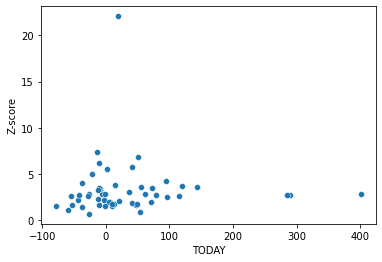

In [16]:
sns.scatterplot(data=detailed, x='TODAY', y= 'Z-score')

In [27]:
DF = detailed[['1D', 'Z-score']]

In [23]:
kmeans = KMeans(n_clusters=3)

In [28]:
kmeans.fit(DF)

KMeans(n_clusters=3)

In [29]:
kmeans.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 2])

<AxesSubplot:xlabel='1D', ylabel='Z-score'>

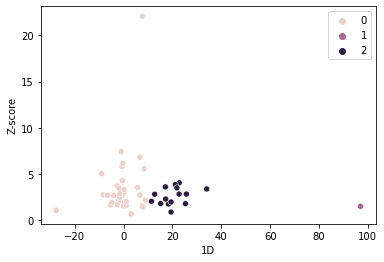

In [30]:
sns.scatterplot(data=DF, x="1D", y="Z-score", hue=kmeans.labels_)